<a href="https://colab.research.google.com/github/ricardoestevez/datascience/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Forest
---

Para iniciar a conversa sobre Florestas Aleatórias, dois conceitos são necessários serem vistos previamente:


1.   Árvores de Decisão
2.   Técnica de Ensemble


###Árvore de Decisão



Pode ser vista de forma simples como um _If-Else_ usado de modo a criar ramos de decisão a partir de valores possíveis dentro do conjunto de dados. Geralmente a explicação da construção de uma árvore é vista como:

- Folhas: Resposta final na decisão
- Ramos: Corresponde a um valor de atributo
- Nó: Testa um atributo

 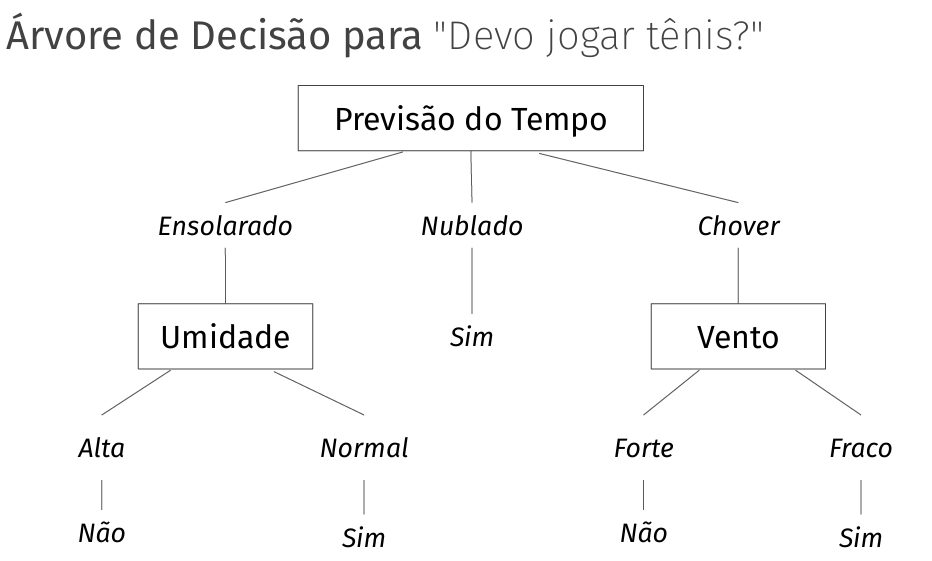


#### Como árvore escolhe por onde começar e para onde ir?

Para a escolha de onde começar uma árvore ou para qual próxima ramificação deve-se seguir utiliza-se o calculo da **Entropia** e consequentemente do **Ganho de informação**.

**Entropia**: Avalia a distribuição dos dados dentro do grupo, quanto mais "desordenados" maior a entropia, quanto menor a entropia mais 'puro' é o grupo.

$$
Entropia(S) = - \sum_{i=1}^{k} p_i \log_2(p_i)
$$

Onde:  
  - ($S$) é o conjunto de dados do nó  
  - ($k$) é o número de classes  
  - ($p_i$) é a proporção da classe $i$


**Ganho de informação**: Avalia a mudança na entropia entre ao dividir aquela feature, de modo a escolher quando **maior** o resultado.

O ganho de informação ao dividir o conjunto ($S$) pelo atributo ($A$) é definido como:

$$
IG(S, A) = Entropia(S) - \sum_{v \in \text{Valores}(A)} \frac{|S_v|}{|S|} H(S_v)
$$

onde:
- ($Entropia(S)$) é a entropia antes da divisão,
- ($v$) são os possíveis valores de ($A$),
- ($S_v$) é o subconjunto de (S) onde ($A = v$),
- ($\frac{|S_v|}{|S|}$) é o peso proporcional de cada subconjunto.



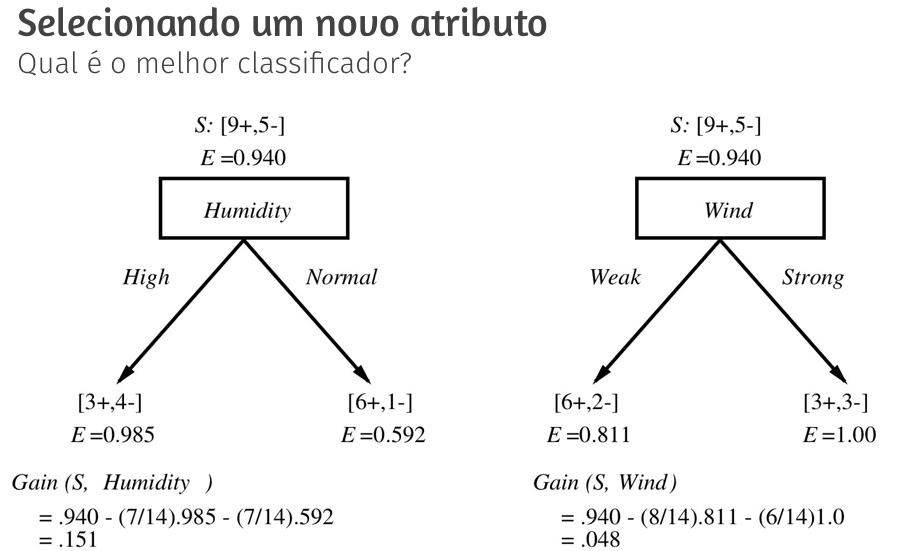

#### Principais Vantagens e Desvantagens da Árvore de Decisão



Adiantando, uma floresta aleatória (Random Forest) nada mais é do que um conjunto de Árvores de Decisão, desse modo é importante primeiro entender quais vantagens e desvantagem desse modelo.

**Vantagens**
- Facilidade na explicabilidade e interpretação do resultado devido sua lógica de escolha.
- Pouco pré processamento: Não possui necessidade de padronização dos dados ou normalização, lidando bem com variaveis categóricas.
- Funciona com bem com ruído dos dados.
- Modelo rápido para treinamento (em árvores não muito extensas).

**Desvantagens**

- Caso árvore fique muito extensa perde a facilidade na interpretação.
- Árvores grandes tendem a _Overfitting_
- Pouco instável, podendo gerar um modelo diferente com pouca mudança nos dados.

### Técnica de Ensemble

Ensemble consiste em combinar múltiplos algoritmos a fim de obter um melhor desempenho preditivo do que obtido de forma individual em cada um deles. No geral, modelos tidos como mais _fracos_ ficam fortes com ensemble pois cada modelo supre a fraqueza do outro, porém modelos em geral já fortes (ex. SVM) não possuem ganho significativo na combinação.

Alguns tipos de Ensemble são:
1. *Bagging:* Treinamento de modelos iguais, cada um com uma amostra diferente (com ou sem reposição). **Visando reduzir variância e overfitting.**
2. *Boosting:* Treina modelos de forma sequêncial com o seguinte tentando melhorar o resultado do anterior. **Visando reduzir viés.**
3. *Stacking:* Treina diferentes modelos e cria um meta-modelo combinando as previsões. **Busca melhorar performance.**



### Random Forest

De fato chegando ao modelo Random Forest, ele consiste na aplicação de Ensemble (geralmente bagging) de _n_ árvores de decisão cada uma treinada com um subconjunto de dados com ou sem reposição. Para escolher o resultado final usa-se a resposta majoritária dentre todas as árvores.

Visando trazer mais complexidade ao modelo para um melhor resultado, cada árvore é treinada utilizando não somente um subconjunto dos dados, como um subconjunto de features em geral usa-se $\sqrt{n}$, desse modo a árvore usa menos atributos e pode crescer mais.

Outro ponto a ser considerado é a **importância da feature** dentro do modelo, pensando em otimizar o resultado com menor custo, tende-se a comparar o desempenho em modelos sem as features menos importante e com elas para verificar se é possível retira-las sem perder acurácia.

Para as divisões dos ramos em geral usa-se o **Gini** para calculo de desempenho.

**Gini**: similar a entropia verifica a distribuição dos dados na divisão, quanto menor o Gini mais "puro", ou seja, mais elementos de uma categoria. A árvore escolhe sempre o elemento que mais **reduz** o Gini.

$$
Gini(S)=1−\sum_{i=1}^{k}​p_i^2​
$$

onde:
- ($p_i$) = proporção da classe $i$ no nó
- $k$ = número de classes


Os hiperparametros utilizados na construção de uma floresta aleatória são:

- *n_estimators* define o número de árvores que compõe a floresta.
- *max_features* número máximo de atributos que poderão ser usados para determinar a separação de cada nó.
- *max_depth* controla a profundidade permitida para cada árvore, esse controle pode previnir overfitting.
- *min_samples_split* mínimo de amostras para dividir um nó, números altos reduz complexidade da árvore.
- *min_samples_leaf*  mínimo de amostras nas folhas, evitando grupos pequenos.
- *bootstap* indica se a seleção dos conjuntos de dados serão com ou sem reposição.
- *criterion* qual métrica de escolha das divisões (em geral *gini* ou *entropy*).




#### Principais Vantagens e Desvantagens Random Forest

Dado que este modelo é uma evolução da árvore de decisão, com aplicação de diversas árvores, alguns problemas encontrados anteriormente são solucionados ao passo que outros aparecem.

**Vantagens**
- Reduz overfitting drasticamente.
- Maior estabilidade no modelo, não sofrendo alterações com pequenas mudanças.
- Pouco pré processamento: Não possui necessidade de padronização dos dados ou normalização, lidando bem com variaveis categóricas.
- Bom resultado de baseline, geralmente é um bom modelo de inicio sem necessidade de ajustes finos.

**Desvantagens**

- Baixa explicabilidade, com a criação de diversas árvores torna-se dificil visualizar e explicar cada decisão.
- Modelo mais lento em processamento devido a criação de diversas árvores.
- Exige maior capacidade computacional quanto maior tamanho das árvores e quantidade de árvores.

### Aplicação prática

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np

In [ ]:
# 1. Carregar Iris
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:

# 2. Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 3. Treinar Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Previsões
y_pred = model.predict(X_test)

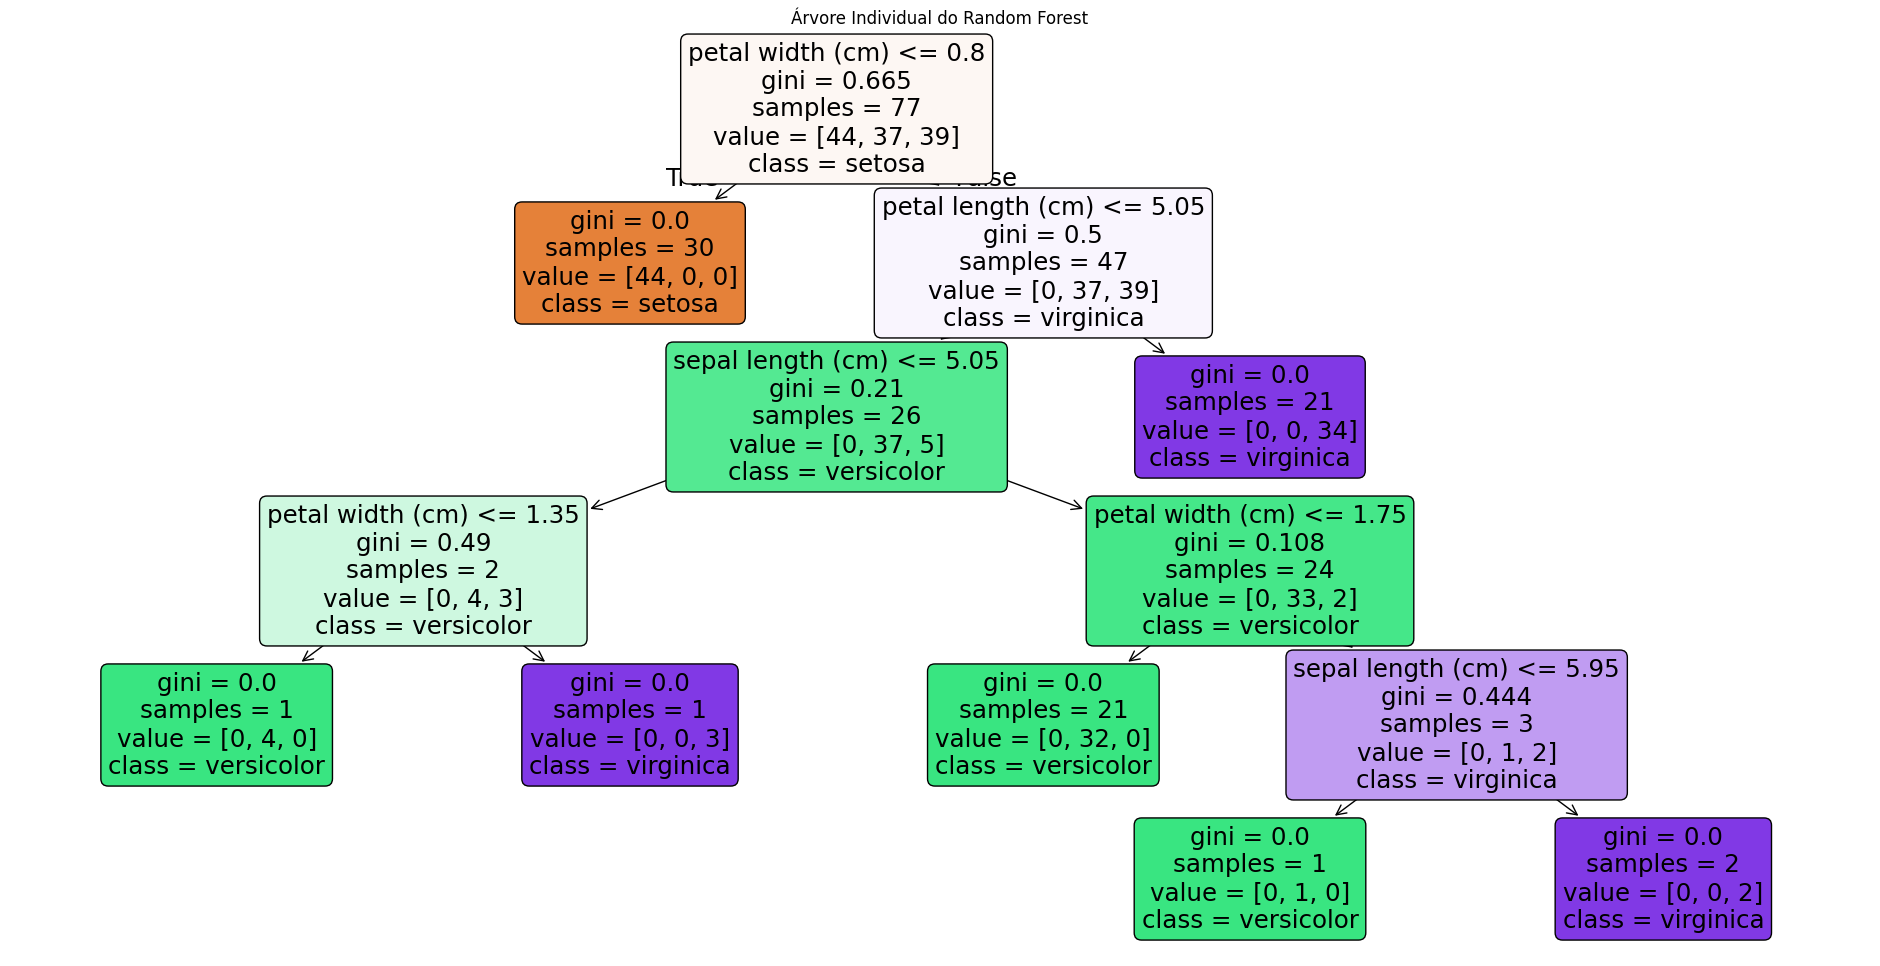

In [ ]:
# Pegando uma arvore na floresta
tree = model.estimators_[5]

plt.figure(figsize=(24, 12))
plot_tree(
    tree,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True
)
plt.title("Árvore Individual do Random Forest")
plt.show()

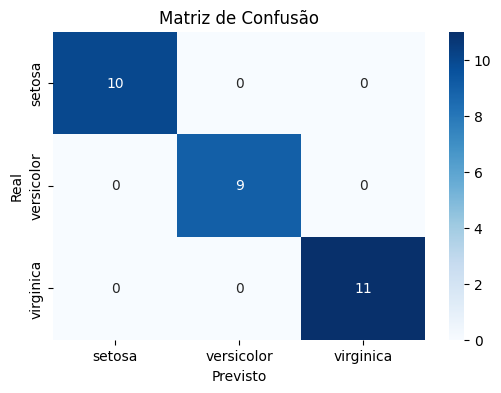

In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

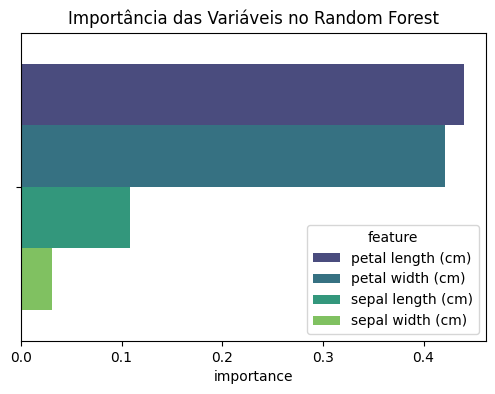

In [ ]:
# Importância das Features
importances = model.feature_importances_
feat_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(data=feat_df, x="importance", hue="feature", palette="viridis")
plt.title("Importância das Variáveis no Random Forest")
plt.show()

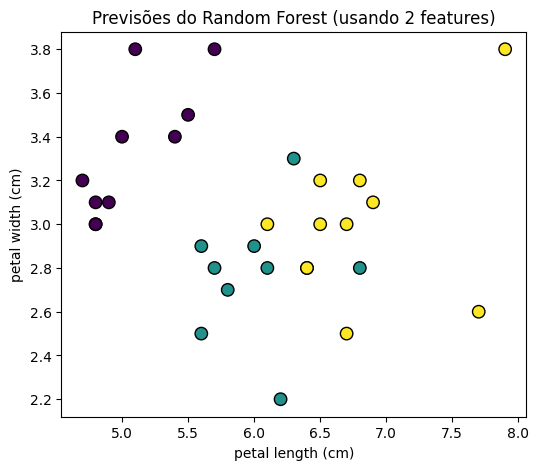

In [ ]:
# Scatter plot com previsões
plt.figure(figsize=(6,5))
plt.scatter(
    X_test[:, 0], X_test[:, 1],
    c=y_pred, cmap="viridis", s=80, edgecolor="k"
)
plt.title("Previsões do Random Forest (usando 2 features)")
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.show()


## Random Forest para Regressão

Apesar dos modelos de Floresta Aleatória serem mais conhecidos na classificação de dados categóricos, existe a opção de utilizar na construção de resultados númericos continuos.

Para isso algumas mudanças são necessarias nas métricas para que seja possível aplicar o mesmo conceito em uma nova forma de dado.

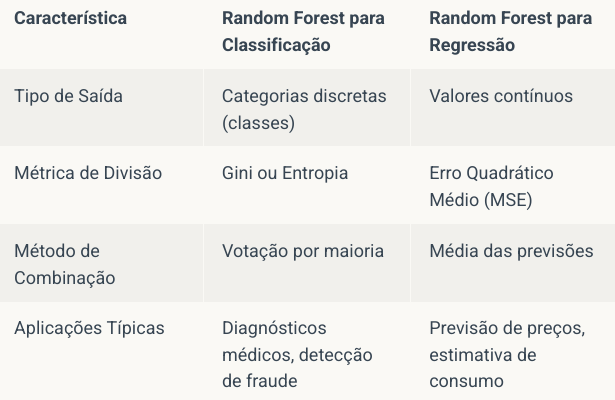

- **Valores de Saída:** Números, continuos.
- **Critério de Divisão:** Utilizando do Erro Quadrático Médio, avalia a divisão na busca do menor erro, minimizando a diferença dentro daquele grupo. A partir da média de valores naquele grupo, avalia o MSE e compara com valor do erro no nó Pai (superior) com o erro ponderado das duas divisões, e então escolhe as divisões que trazem o melhor resultado na diferença entre Pai e divisão.
  - Calculo MSE: $$\hat{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$$
  $$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y})^2$$
  $$\text{MSE}_{Pai} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_{Pai})^2$$
  $$\text{MSE}_L = \frac{1}{n_L} \sum_{i=1}^{n_L} (y_i - \hat{y}_L)^2$$
  $$\text{MSE}_R = \frac{1}{n_R} \sum_{i=1}^{n_R} (y_i - \hat{y}_R)^2$$
  $$\text{MSE}_{\text{split}} =
\frac{n_L}{n} \cdot \text{MSE}_L +
\frac{n_R}{n} \cdot \text{MSE}_R$$
$$\Delta \text{MSE} =
\text{MSE}_{Pai} - \text{MSE}_{\text{split}}$$
  - Um problema que isso pode causar, é o *overfitting* visto que a árvore sempre ira crescer trazendo essas divisões com melhoras no MSE. Caso não se controle um critério de parada a árvore irá aprender ate sobrar só um ponto no nó.
  - As opções para parada assim como na RandomForest para classificação são: `max_depth` -> limite bruto || `min_samples_leaf` -> estabilidade local     || `min_impurity_decrease` -> qualidade do split.

- **Método de Decisão**: Dado que as respostas são valores númericos, o resultado final será a média dos valores obtidos. Dado que cada árvore gera um erro diferente, a média dos valores "corrige" esses erros.








In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Lendo _dataset_ sobre preço das casas na Califórnia. A variável resposta são preços de casas em $100.000,00. Dentre as váriaveis de entrada, temos: *Média de quartos, População na região, localidade (Latitude Longitude), Média comodos, etc.*


In [6]:
# Carregar o dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data,
columns=california.feature_names)
y = california.target
# Visualizar primeiras linhas
print(X.head())
print("\nFormato dos dados:", X.shape)
print("\nEstatísticas descritivas das variaveis de Entrada:\n")
print(X.describe())

print("\n Valores da Saída (Custo das casas em 100.000$):\n")
print(y)
print("Máx: ", np.max(y))
print("Média:", np.mean(y))
print("Mediana:", np.median(y))
print("Min: ", np.min(y))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Formato dos dados: (20640, 8)

Estatísticas descritivas das variaveis de Entrada:

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      

In [8]:
# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (16512, 8)
Tamanho do conjunto de teste: (4128, 8)


In [22]:
# Criar e treinar o modelo Random Forest
modelo_rf = RandomForestRegressor(
    n_estimators=100,    # Número de árvores
    max_depth=None,      # Profundidade máxima das árvores
    min_samples_split=2, # Mínimo de amostras para dividir um nó
    min_impurity_decrease=0.0001, # Mínimo de redução de impureza para dividir um nó
    random_state=42      # Semente aleatória para reprodutibilidade
)
# Treinar o modelo com os dados de treino
import time
inicio = time.time()
modelo_rf.fit(X_train, y_train)
fim = time.time()
print(f"Tempo de treinamento: {fim - inicio:.2f} segundos")

Tempo de treinamento: 18.94 segundos


In [23]:
# Fazer previsões no conjunto de teste
y_pred = modelo_rf.predict(X_test)
# Visualizar primeiras previsões vs valores reais
resultados = pd.DataFrame({
    'Real': y_test,
    'Previsto': y_pred,
    'Diferença': y_test - y_pred
})
print(resultados.head(10))

      Real  Previsto  Diferença
0  0.47700  0.587500  -0.110500
1  0.45800  0.797713  -0.339713
2  5.00001  4.894907   0.105103
3  2.18600  2.490805  -0.304805
4  2.78000  2.229481   0.550519
5  1.58700  1.629166  -0.042166
6  1.98200  2.378407  -0.396407
7  1.57500  1.637406  -0.062406
8  3.40000  2.712991   0.687009
9  4.46600  4.858334  -0.392334


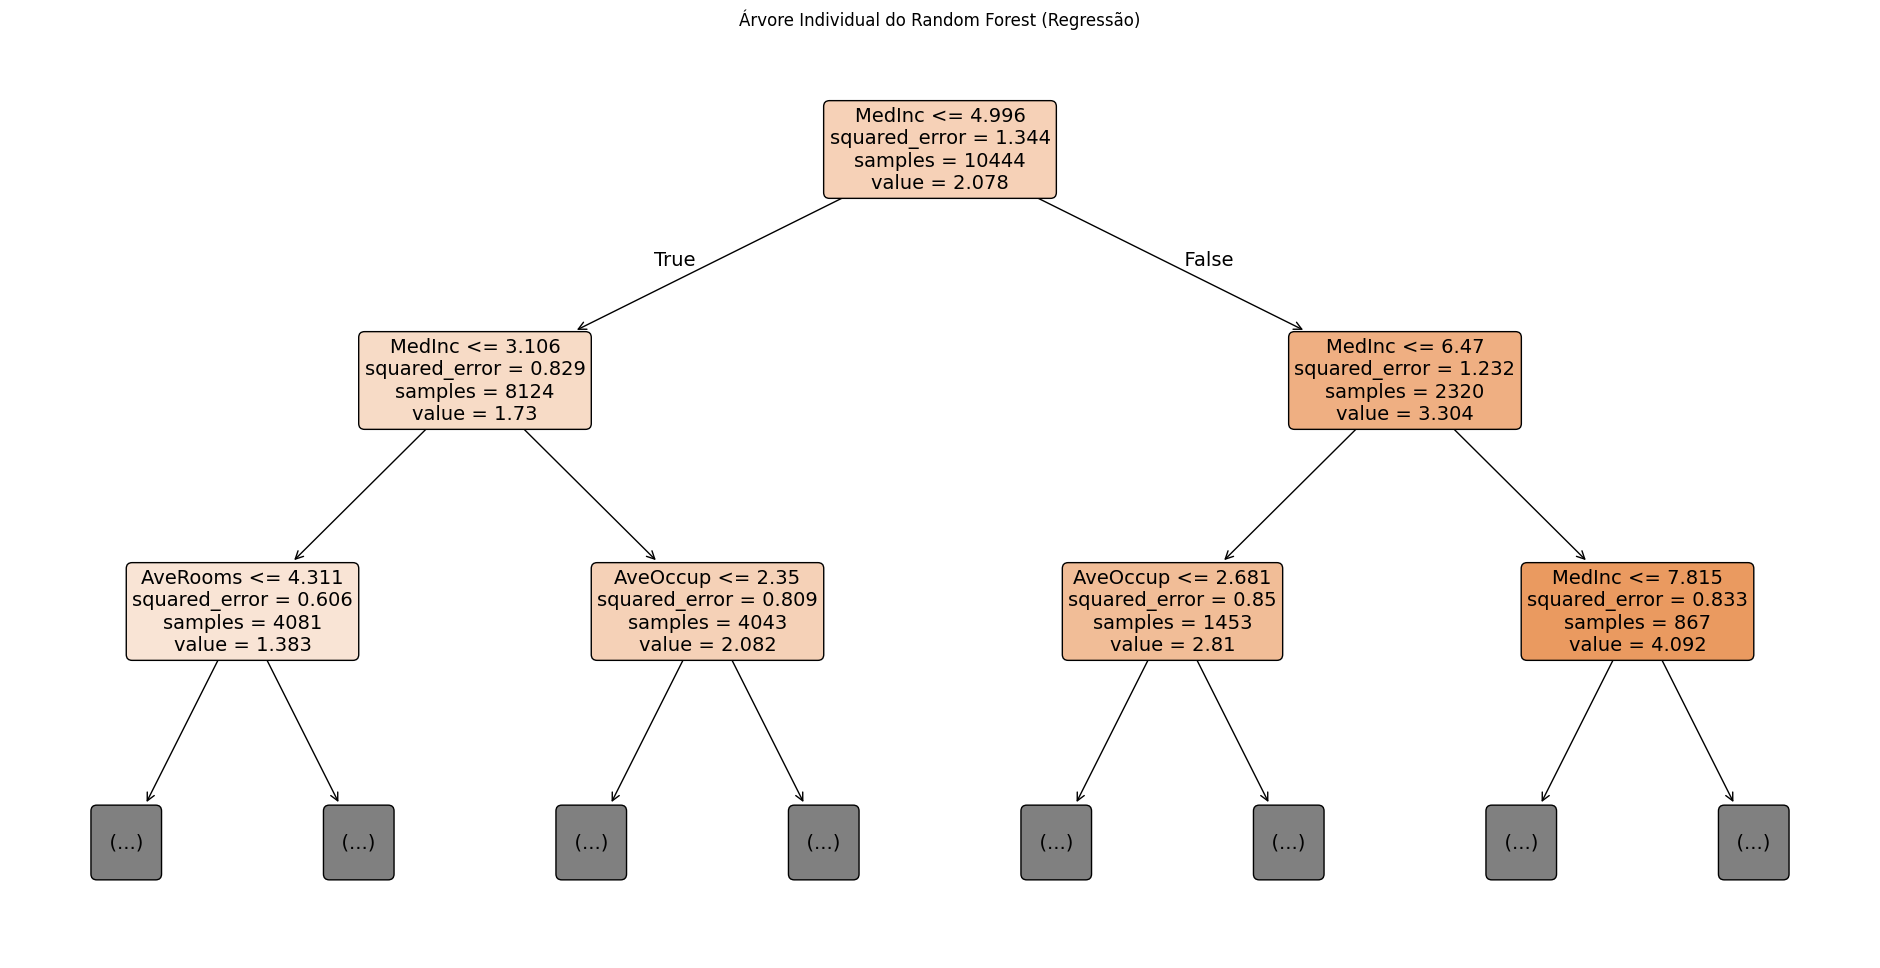

In [24]:
# Pegando uma arvore na floresta
tree = modelo_rf.estimators_[5]

plt.figure(figsize=(24, 12))
plot_tree(
    tree,
    feature_names=california.feature_names,  # opcional, mas recomendado
    filled=True,
    rounded=True,
    max_depth=2,  # profundidade máxima da árvore
)
plt.title("Árvore Individual do Random Forest (Regressão)")
plt.show()

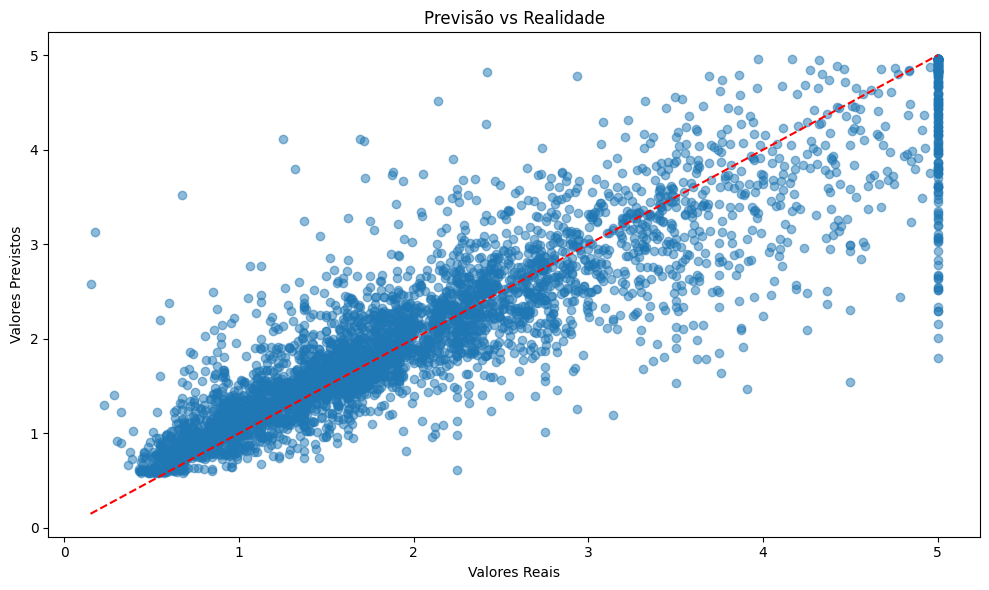

In [25]:
# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)],
         'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Previsão vs Realidade')
plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calcular métricas de avaliação
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"MAE (Mean Absolute Error, quanto o modelo erra pra cima e pra baixo): {mae:.4f}")
print(f"R² (Coeficiente de Determinação, quanto o modelo explica os dados): {r2:.4f}")

RMSE (Root Mean Squared Error): 0.5166
MAE (Mean Absolute Error, quanto o modelo erra pra cima e pra baixo): 0.3410
R² (Coeficiente de Determinação, quanto o modelo explica os dados): 0.7963
